NOTICE: Run using conda environment with ezc3d installed

In [104]:
import matplotlib.pyplot as plt
import numpy as np
import os
from ezc3d import c3d
import pandas as pd

In [105]:
# Rodar com os caminhos para os arquivos c3d
vj01c3dPath = './Vertical_jump0101.c3d'
#vj02c3dPath = './Vertical_jump0102.c3d'
#vj03c3dPath = './Vertical_jump0103.c3d'

In [106]:
# Função de leitura do c3d
def loadc3d(datc3d):
    datac3d = c3d(datc3d)
    #point_data = datac3d['data']['points']
    analog_data = datac3d['data']['analogs']
    # Reshaping the analog data
    #reshaped_point_data = point_data.reshape(48,point_data.shape[2])
    reshaped_analog_data = analog_data.reshape(12,analog_data.shape[2])
    return reshaped_analog_data

In [107]:
# Salvando dados em variáveis
point1 = pd.read_csv('./Vertical_jump0101_PointDataChannels.csv')
analog1 = loadc3d(vj01c3dPath)
#point2 = pd.read_csv('./Vertical_jump0102_PointDataChannels.csv')
#analog2 = loadc3d(vj02c3dPath)
#point3 = pd.read_csv('./Vertical_jump0103_PointDataChannels.csv')
#analog3 = loadc3d(vj03c3dPath)

In [108]:
print('point1\'s shape: ',point1.shape)
print('analog1\'s shape: ',analog1.shape)
#print('point2\'s shape: ',point2.shape)
#print('analog2\'s shape: ',analog2.shape)
#print('point3\'s shape: ',point3.shape)
#print('analog3\'s shape: ',analog3.shape)

point1's shape:  (436, 48)
analog1's shape:  (12, 4360)


In [109]:
point1['head                          _Z']

0      1720.2909
1      1720.3014
2      1719.8557
3      1719.7596
4      1719.9413
         ...    
431    1715.3011
432    1715.4736
433    1715.3729
434    1715.4313
435    1715.3884
Name: head                          _Z, Length: 436, dtype: float64

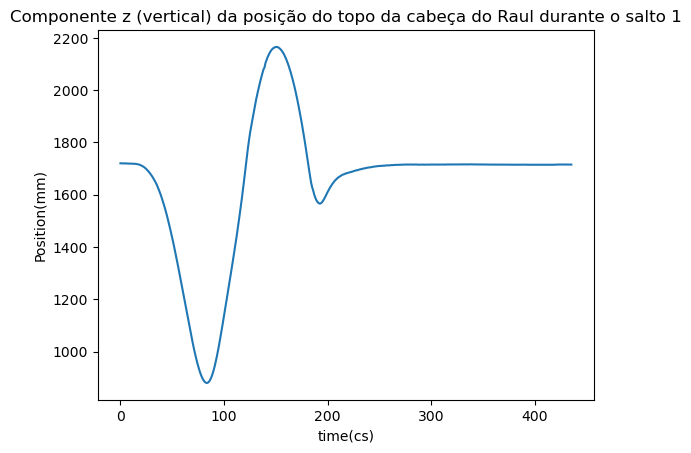

In [110]:
plt.plot(point1['head                          _Z'])
plt.title('Componente z (vertical) da posição do topo da cabeça do Raul durante o salto 1')
plt.xlabel('time(cs)')
plt.ylabel('Position(mm)')
plt.show();

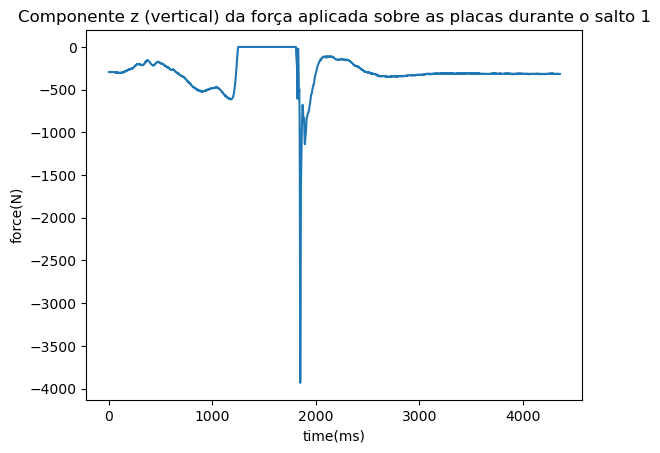

In [91]:
plt.plot(analog1[2])
plt.title('Componente z (vertical) da força aplicada sobre as placas durante o salto 1')
plt.xlabel('time(ms)')
plt.ylabel('force(N)')
plt.show();

In [125]:
# Supondo que você tenha os dados armazenados em 'point1'
x = np.arange(len(point1['head                          _Z']))

# Substitua 'head_Z' pelo nome real da coluna que representa o eixo y no seu DataFrame ou dicionário
y = point1['head                          _Z']

# Encontrar o índice do valor mínimo em y
indice_minimo = np.argmin(y)

# Encontrar o valor de x correspondente ao valor mínimo em y
x_valor_minimo = x[indice_minimo]

# Encontrar o índice do valor máximo em y
indice_maximo = np.argmax(y)

# Encontrar o valo de x correspondente ao valor máximo de y
x_valor_maximo = x[indice_maximo]

In [126]:
# Momento (em cs) em que a cabeça está no ponto mais baixo, e a posição (em mm)
print(x_valor_minimo,'cs : ',y[x_valor_minimo],'mm')

83 cs :  879.941 mm


In [127]:
# Momento (em cs) em que a cabeça está no ponto mais alto, e a posição (em mm)
print(x_valor_maximo,'cs : ',y[x_valor_maximo],'mm')

151 cs :  2165.6338 mm


In [143]:
# Coletando forças durante contramovimento
f_during_countermovement = analog1[2][830:1510]
f_during_countermovement

array([-482.61169434, -483.83239746, -481.39099121, -485.05310059,
       -484.44274902, -482.61169434, -483.2220459 , -485.66345215,
       -488.1048584 , -489.32556152, -487.49450684, -489.32556152,
       -489.93591309, -491.15661621, -495.42907715, -491.76696777,
       -491.76696777, -494.20837402, -496.03942871, -495.42907715,
       -496.03942871, -495.42907715, -498.48083496, -497.8704834 ,
       -500.92224121, -502.7532959 , -501.53259277, -505.80505371,
       -503.97399902, -507.02575684, -508.24645996, -508.24645996,
       -507.6361084 , -510.07751465, -510.68786621, -510.07751465,
       -510.07751465, -511.29821777, -509.46716309, -511.90856934,
       -509.46716309, -510.07751465, -511.29821777, -510.68786621,
       -511.29821777, -511.29821777, -511.29821777, -511.29821777,
       -516.18103027, -511.90856934, -513.12927246, -512.5189209 ,
       -512.5189209 , -516.79138184, -514.34997559, -515.57067871,
       -517.4017334 , -517.4017334 , -516.79138184, -519.84313

In [147]:
# Cálculo da força média durante o contramovimento
cmFmean = -np.mean(f_during_countermovement) # "menos" para obter o valor positivo
cmFmean

309.3254519518684

In [150]:
# Obtendo o impulso médio desde o início do contramovimento até
avgImpulseDuringCM = cmFmean / ((151-83)*0.01)
print("AVERAGE IMPULSE FROM START OF COUNTERMOVEMENT UNTIL MAX HEIGTH AQUIRED DURING JUMP:",avgImpulseDuringCM,'N/s')

AVERAGE IMPULSE FROM START OF COUNTERMOVEMENT UNTIL MAX HEIGTH AQUIRED DURING JUMP: 454.8903705174535 N/s
